In [66]:
#importuje wszytskie potrzebne biblioteki w tym biblioteke kwant
import kwant
import numpy as np
import types
import matplotlib.pyplot as plt
      
    
#Obliczenia prowadze sa w jednostkach atomowych e=h=me=1. Tutaj definiuje wspolczynniki konwersji.
def eV2au(energy): #eV -> j.a
    return energy*0.03674932587122423
def nm2au(length): #nm -> j.a
    return length*18.89726133921252
def T2au(length):  #nm -> j.a
    return length*4.254382E-6


In [67]:
d = nm2au(50)
t = eV2au(-3)
sin_30 = np.sin(30*np.pi/180)
cos_30 = np.cos(30*np.pi/180)

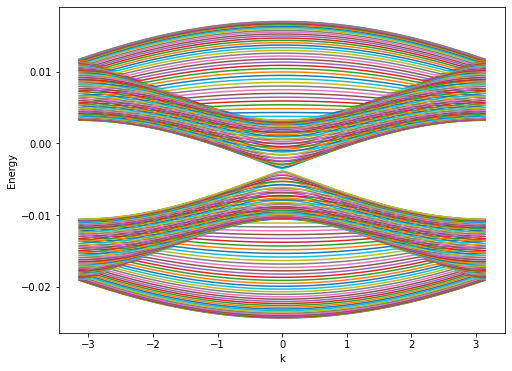

In [68]:
def make_system(x_min = -200, x_max = 200, y_min = -79.9, y_max = 79.9, V_np = 0.1, B = 0, sf = 16):
    y_min = nm2au(y_min)
    y_max = nm2au(y_max)
    x_min = nm2au(x_min)
    x_max = nm2au(x_max)
    t0 = t/sf
    B = T2au(B)
    V_np = eV2au(V_np)
    a0 = nm2au (0.25) * sf

    sys_gr1 = kwant.Builder()

    graphene = kwant.lattice.general([(0 , a0 ) , ( cos_30 *a0 , sin_30 * a0 )],
                                         [(0 , 0) , ( a0 / np . sqrt (3) , 0) ], norbs =1)

    lat_A, lat_B = graphene.sublattices

    def rect(pos):
        x, y = pos
        if x_min<=x<=x_max and y_min<=y<=y_max:
            return True
        else:
            return False

    def lead_shape(pos):
        x, y = pos
        return (y_min <= y <= y_max)

    def potential(site):
        x, y = site.pos
        return V_np*np.tanh(x/d)

    def nn_hopping(site1, site2):
        x1, y1 = site1.pos
        x2, y2 = site2.pos
        flux = -B*(y1+y2)*(x2 -x1)/2
        return t0*np.exp(1j*flux)

    sys_gr1[graphene.shape(rect, (0,0))] = potential
    sys_gr1[graphene.neighbors()] = nn_hopping

    syml = kwant.TranslationalSymmetry([-np.sqrt(3)*a0, 0])
    symr = kwant.TranslationalSymmetry([np.sqrt(3)*a0, 0])
    # syml.add_site_family(graphene.sublattices[0], other_vectors=[(1, -1)])
    # syml.add_site_family(graphene.sublattices[1], other_vectors=[(1, -1)])

    leadl = kwant.Builder(syml) 
    leadl[graphene.shape(lead_shape, (0, 0))] = V_np*np.tanh(x_min/d)
    leadl[graphene.neighbors()] = nn_hopping

    leadr = kwant.Builder(symr) 
    leadr[graphene.shape(lead_shape, (0, 0))] = V_np*np.tanh(x_max/d)
    leadr[graphene.neighbors()] = nn_hopping

    sys_gr1.attach_lead(leadl)
    sys_gr1.attach_lead(leadr)
    sysf = sys_gr1.finalized()
#     kwant.plot(sys_gr1, site_color = potential, site_lw=0.1, site_size=0.5, cmap ="gist_heat_r", file = "potential_map.png")
    return sysf

sysf = make_system()
kwant.plotter.bands(sysf.leads[0], show=True,  fig_size = (8,6));



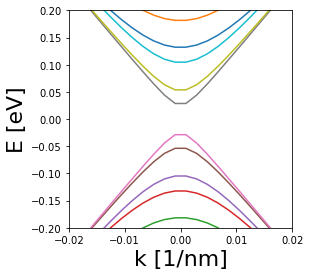

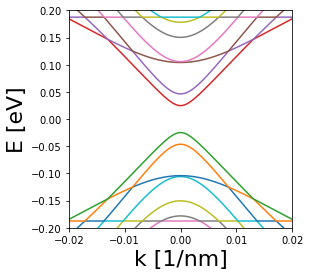

In [100]:
def disperssion(nr_lead, k_max, nk):
    sys=make_system(-15, 15, -12.9, 12.9, 0, 0, sf)
    momenta = np.linspace(-k_max*dx,k_max*dx,nk)
    bands=kwant.physics.Bands(sys.leads[nr_lead])
    energies=[bands(k) for k in momenta]
    return (momenta/dx), energies


sf = 1
a0 = nm2au(0.25)*sf
dx=np.sqrt(3)*a0
momenta, energies = disperssion(0, np.pi/dx, 400)
plt.figure(figsize=(4,4))
plt.plot(momenta, np.asarray(energies)/eV2au(1.0)) 
plt.xlabel("k [1/nm]",fontsize=22)
plt.ylabel("E [eV]",fontsize=22)
plt.ylim(-0.2, 0.2)
plt.xlim(-0.02, 0.02)

sf = 16
a0 = nm2au(0.25)*sf
dx=np.sqrt(3)*a0
momenta, energies = disperssion(0, np.pi/dx, 400)
plt.figure(figsize=(4,4))
plt.plot(momenta, np.asarray(energies)/eV2au(1.0)) 
plt.xlabel("k [1/nm]",fontsize=22)
plt.ylabel("E [eV]",fontsize=22)
plt.ylim(-0.2, 0.2)
plt.xlim(-0.02, 0.02)
# plt.savefig("dyspersja_3.jpg")
plt.show()

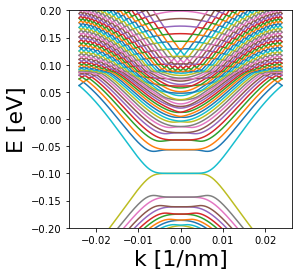

In [105]:
def disperssion_2(nr_lead, k_max, nk, B, sf):
    a0 = nm2au(0.25)*sf
    dx=np.sqrt(3)*a0
    sys=make_system(B = B, sf = sf)
    momenta = np.linspace(-k_max*dx,k_max*dx,nk)
    bands=kwant.physics.Bands(sys.leads[nr_lead])
    energies=[bands(k) for k in momenta]
    return (momenta/dx), energies

momenta, energies = disperssion_2(0, np.pi/dx, 400, 1.5, 16)
plt.figure(figsize=(4,4))
plt.plot(momenta, np.asarray(energies)/eV2au(1.0)) 
plt.xlabel("k [1/nm]",fontsize=22)
plt.ylabel("E [eV]",fontsize=22)
plt.ylim(-0.2, 0.2)
plt.savefig("dyspersja_4.jpg")
plt.show()

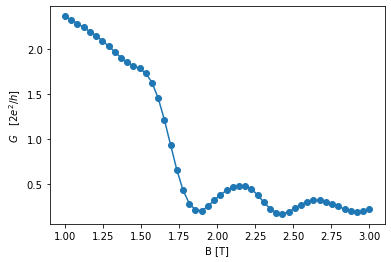

In [109]:
# B_min = 1
# B_max = 3
# B_table = np.linspace(B_min, B_max, 50)
# E = 0
# cond_table = []

# for B in B_table:
#     sys = make_system(B = B)
#     smatrix=kwant.smatrix(sys,E)
#     cond_table.append(smatrix.transmission(1,0))

plt.plot(B_table, cond_table, "o-")
plt.xlabel("B [T]")
plt.ylabel(r"$G \quad [2e^2/h]$")
plt.savefig("conductance.png")
plt.show()
    

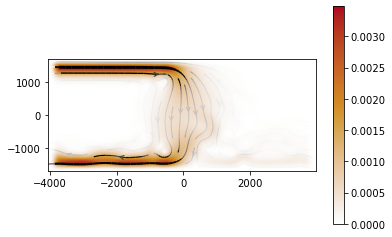

/tmp/ipykernel_6185/1458522388.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(sys,curr)


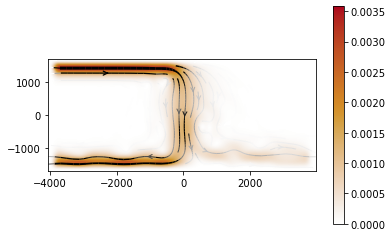

/tmp/ipykernel_6185/1458522388.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(sys,curr)


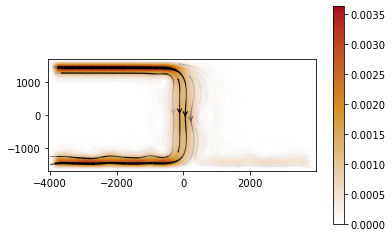

/tmp/ipykernel_6185/1458522388.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(sys,curr)


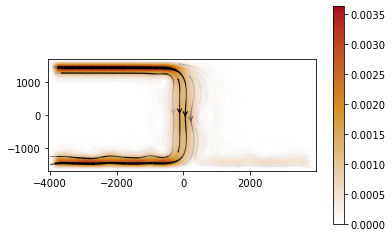

In [115]:
B = 1.9
sys = make_system(B = B)
current = kwant.operator.Current(sys).bind()
psi=kwant.wave_function(sys, 0)(0)
curr=current(psi[0])
kwant.plotter.current(sys,curr)

B = 2.2
sys = make_system(B = B)
current = kwant.operator.Current(sys).bind()
psi=kwant.wave_function(sys, 0)(0)
curr=current(psi[0])
kwant.plotter.current(sys,curr)

B = 2.4
sys = make_system(B = B)
current = kwant.operator.Current(sys).bind()
psi=kwant.wave_function(sys, 0)(0)
curr=current(psi[0])
kwant.plotter.current(sys,curr)